# Fashion MNIST

In [5]:
!pip install -q tensorflow matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(42)
tf.random.set_seed(42)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
fashion_mnist = pd.read_csv("/content/drive/MyDrive/ML/fashion-mnist_test.csv")

## Load & Preprocessing

In [8]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand dims for CNN
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# One-hot encode
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## CNN Model

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [10]:
#Training

history = model.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 66s 85ms/step - accuracy: 0.7196 - loss: 0.7563 - val_accuracy: 0.8664 - val_loss: 0.3734
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 69ms/step - accuracy: 0.8694 - loss: 0.3598 - val_accuracy: 0.8845 - val_loss: 0.3193
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 52s 69ms/step - accuracy: 0.8906 - loss: 0.2982 - val_accuracy: 0.8942 - val_loss: 0.2915
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 49s 66ms/step - accuracy: 0.9040 - loss: 0.2608 - val_accuracy: 0.9030 - val_loss: 0.2737
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 68ms/step - accuracy: 0.9155 - loss: 0.2311 - val_accuracy: 0.9044 - val_loss: 0.2732
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 85s 72ms/step - accuracy: 0.9240 - loss: 0.2070 - val_accuracy: 0.8990 - val_loss: 0.2891
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 67ms/step - accuracy: 0.9316 - loss: 0.1862 - val_accuracy: 0.9029 - val_loss: 0.2888
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 67ms/step - accuracy: 0.9398 - loss: 0.1650 - 

### Evaluating Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8941 - loss: 0.4123
Test Accuracy: 0.8974


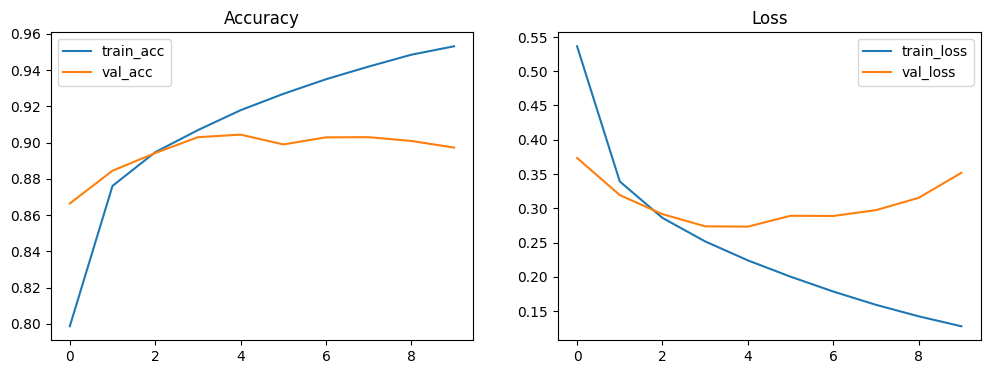

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


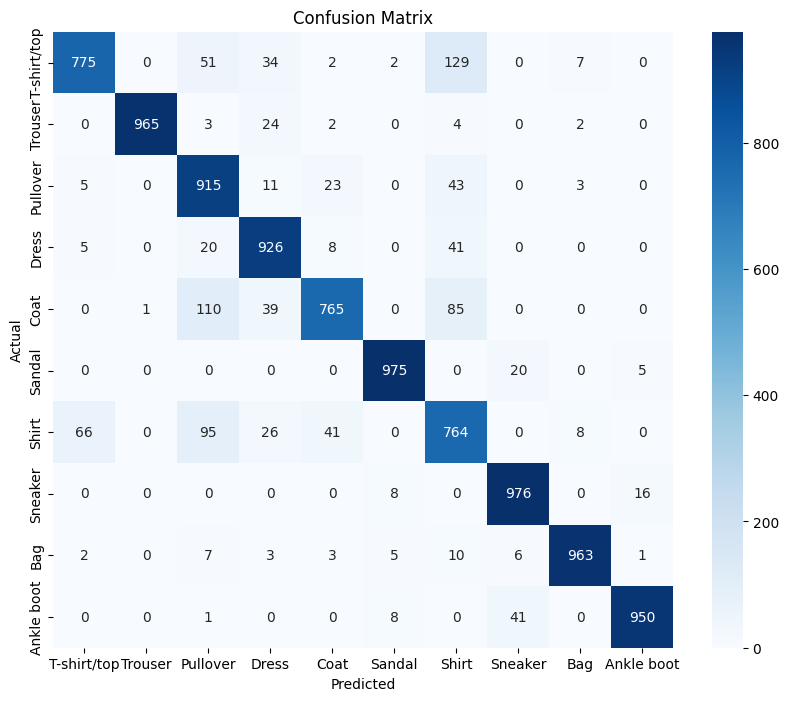

              precision    recall  f1-score   support

 T-shirt/top       0.91      0.78      0.84      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.76      0.92      0.83      1000
       Dress       0.87      0.93      0.90      1000
        Coat       0.91      0.77      0.83      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.71      0.76      0.74      1000
     Sneaker       0.94      0.98      0.96      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.98      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()
plt.show()

# Confusion Matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=class_names))


##Smaller CNN

In [20]:
# Define a smaller CNN
small_cnn = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

small_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

small_cnn.summary()

# Train small CNN
history_small = small_cnn.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       247,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253,322 (989.54 KB)

 Trainable params: 253,322 (989.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.7543 - loss: 0.6823 - val_accuracy: 0.8742 - val_loss: 0.3610
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 34s 45ms/step - accuracy: 0.8786 - loss: 0.3423 - val_accuracy: 0.8907 - val_loss: 0.3068
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.8962 - loss: 0.2878 - val_accuracy: 0.8999 - val_loss: 0.2772
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9069 - loss: 0.2514 - val_accuracy: 0.9024 - val_loss: 0.2659
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9175 - loss: 0.2230 - val_accuracy: 0.9060 - val_loss: 0.2635
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 36ms/step - accuracy: 0.9266 - loss: 0.1997 - val_accuracy: 0.9069 - val_loss: 0.2589
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9348 - loss: 0.1778 - val_accuracy: 0.9088 - val_loss: 0.2604
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.9435 - loss: 0.1574 - 

###Evaluate Smaller CNN

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8978 - loss: 0.3355
Small CNN Test Accuracy: 0.9025
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


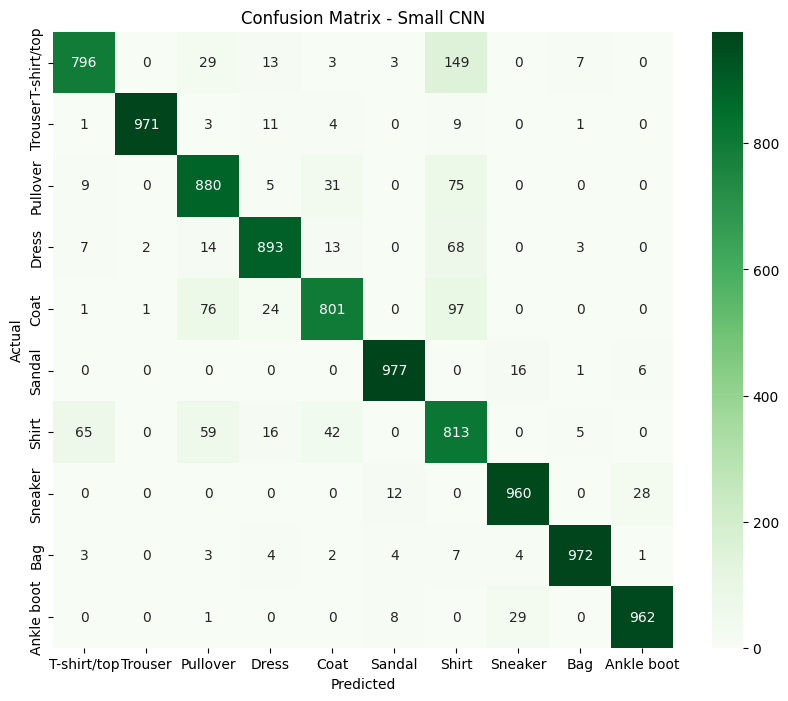

              precision    recall  f1-score   support

 T-shirt/top       0.90      0.80      0.85      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.83      0.88      0.85      1000
       Dress       0.92      0.89      0.91      1000
        Coat       0.89      0.80      0.84      1000
      Sandal       0.97      0.98      0.98      1000
       Shirt       0.67      0.81      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [21]:
# Evaluate on test set
test_loss_small, test_acc_small = small_cnn.evaluate(x_test, y_test_cat)
print(f"Small CNN Test Accuracy: {test_acc_small:.4f}")

# Confusion matrix
y_pred_small = np.argmax(small_cnn.predict(x_test), axis=1)
cm_small = confusion_matrix(y_test, y_pred_small)
plt.figure(figsize=(10,8))
sns.heatmap(cm_small, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Greens')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Small CNN')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_small, target_names=class_names))


##Compare both models


Model Comparison:
           Model  Test Accuracy
0  Baseline CNN         0.8974
1     Small CNN         0.9025


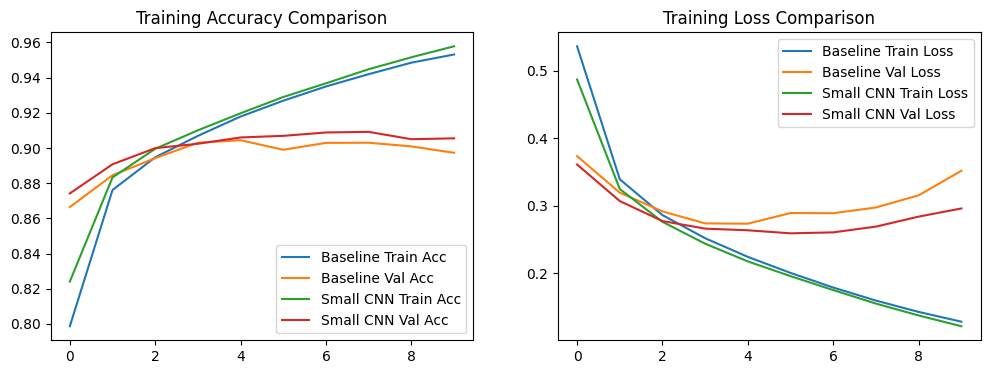

In [22]:
# Comparison table
comparison = pd.DataFrame({
    "Model": ["Baseline CNN", "Small CNN"],
    "Test Accuracy": [test_acc, test_acc_small]
})

print("\nModel Comparison:\n", comparison)

# Plot training curves side by side
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Baseline Train Acc')
plt.plot(history.history['val_accuracy'], label='Baseline Val Acc')
plt.plot(history_small.history['accuracy'], label='Small CNN Train Acc')
plt.plot(history_small.history['val_accuracy'], label='Small CNN Val Acc')
plt.title("Training Accuracy Comparison")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Baseline Train Loss')
plt.plot(history.history['val_loss'], label='Baseline Val Loss')
plt.plot(history_small.history['loss'], label='Small CNN Train Loss')
plt.plot(history_small.history['val_loss'], label='Small CNN Val Loss')
plt.title("Training Loss Comparison")
plt.legend()

plt.show()


##Visualize Sample Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


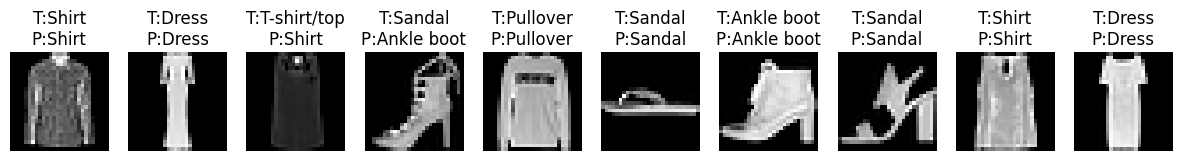

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


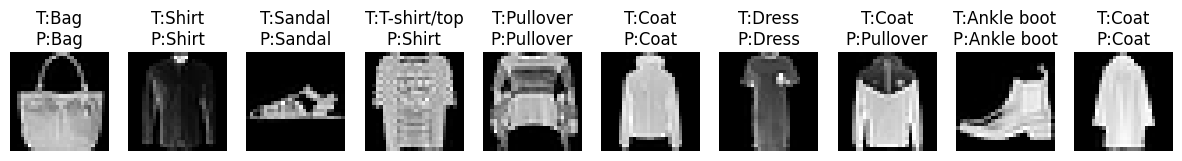

In [23]:
# Function to plot random test images with predictions
def plot_predictions(model, x_data, y_true, num=10):
    indices = np.random.choice(len(x_data), num, replace=False)
    y_pred_labels = np.argmax(model.predict(x_data[indices]), axis=1)

    plt.figure(figsize=(15,4))
    for i, idx in enumerate(indices):
        plt.subplot(1,num,i+1)
        plt.imshow(x_data[idx].squeeze(), cmap='gray')
        plt.title(f"T:{class_names[y_true[idx]]}\nP:{class_names[y_pred_labels[i]]}")
        plt.axis('off')
    plt.show()

# Baseline CNN predictions
plot_predictions(model, x_test, y_test)

# Small CNN predictions
plot_predictions(small_cnn, x_test, y_test)
